<a href="https://colab.research.google.com/github/seulgiKim95/WordCloud/blob/Daehyeon/Wanted_5th_%EC%9B%94%EC%9A%94%EC%9D%BC_%EC%A2%8B%EC%95%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



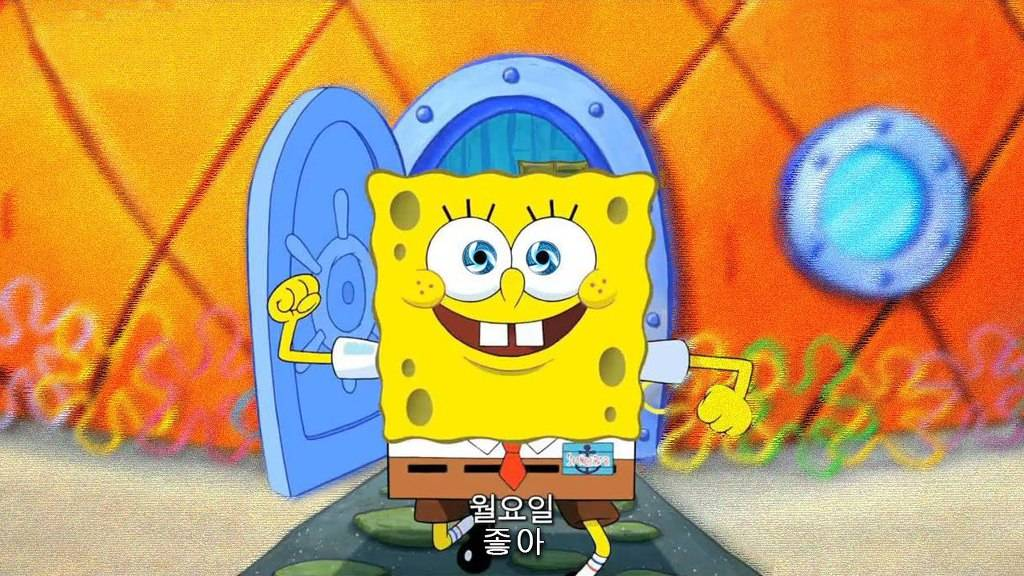


# 가보자고~~

이해가 안 가거나 추가 했으면 하는 내용, 설명이 부족한 부분들을 체크해주세요. 추가하겠습니다. 

In [ ]:
# 이 페이지를 열었을 때 마다 실행해야 됩니다. 
# 코랩은 로컬환경(내 pc에 저장소)에 설치한 라이브러리를 저장하지 않기 때문입니다.
# 실행 후 아래 코드는 주석 처리 해주세요. 주석은 필요부분을 블록처리(드래그나 [Shift]키로 지정)
# 한 영역에 [Ctrl] + [/] 키를 누르면 주석 처리가 됩니다. (한 줄 단위도 됩니다.)
!pip install beautifulsoup4 #뷰티플수프 라이브러리
!pip install selenium #셀리니움 라이브러리
!apt-get update #크롬브라우저는 계속 업데이트가 되기 때문에 자동으로 업데이트를 할 수 있게 해줍니다.
!apt install chromium-chromedriver #셀레니움 이용시 크롬 드라이버가 꼭 필요합니다.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 9.5 MB/s 
     |████████████████████████████████| 358 kB 46.5 MB/s 
     |████████████████████████████████| 139 kB 44.2 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 4.1 MB 38.0 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.10 which is incompatible.
datasci

In [ ]:
## 필요한 라이브러리 import

# -*- coding: UTF-8 -*-
import time #시간지연을 해주기 위함입니다.
import pandas as pd #pandas가 추가 되었습니다. 데이터프레임 생성시 필요
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import json # 아래 필요 이유 서술


In [ ]:
options = webdriver.ChromeOptions() #기본 설정이라고 생각하시면 됩니다. 바로 실행 ㄱㄱ
options.add_argument('--headless')        ## Head-less 설정
options.add_argument('--no-sandbox')    # 이 설정이 있기 때문에 크롬창이 뜨지 않아요.
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

In [ ]:
base_url = "https://www.wanted.co.kr/" #저희는 '원티드' 사이트를 조사하기로 했죠? 
                                       # 만약 다른 사이트를 할 경우 여기 다른 사이트주소를 입력합니다.
keyword = "" # 저희가 찾을 직무를 입력합니다
                          # 데이터 엔지니어, 데이터 분석가, 데이터 사이언티스트, 머신러닝 엔지니어, 데이터 플랫폼 개발자
                          # DBA, 임베디드, IoT, 마켓팅 팀의 데이터 전문가, 정보보안, 백엔드, 풀스택 개발자
                          # 띄어쓰기(공백) 포함입니다.

In [ ]:
## 해당 url로 이동
driver = webdriver.Chrome('chromedriver', options=options)
driver.get(base_url) #base_url변수에는 위에 '원티드'사이트 URL이 들어있습니다.

## 사이트에서 검색어 입력 부분(검색어 창)을 찾아 xpath로 넣어 찾아준다. 사이트에서 돋보기 부분 해당
driver.find_element('xpath','//*[@id="__next"]/div[1]/div/nav/aside/ul/li[1]/button').send_keys(Keys.ENTER)

#search_job = driver.find_element('xpath','//*[@id="__next"]/div[1]/div[2]/div/form/input') # 돋보기를 누른 뒤 검색창에 해당
search_job = driver.find_element('xpath','//*[@id="__next"]/div[1]/div[2]/div/form/input')

## 찾은 검색어 창에 검색어를 입력하고 enter를 친다.
search_job.send_keys(keyword+Keys.ENTER) #keyword는 '직무'가 담겨져 있습니다. 
                                         #현재 keyword에는 '데이터 분석가'가 들어가 있고
                                         #Keys.ENTER로 검색합니다.
                                         #검색창에 데이터 전문가 라고 치고 엔터키 누른 것과 동일

## 페이지가 로딩 되는 동안 기다려준다.(여기서는 5초) #안해주면 사이트를 읽어 올 수가 없습니다.
time.sleep(5) #단위는 초                                       #꼭 5초가 아니어도 되지만 여유 있게 시간을 줍시다.

# 페이지 스크롤 다 내리기
# 원티트 홈페이지에서 우리가 원하는 채용공고를 확인하려면 페이지 스크롤을 다 내려주어야 합니다.
# 웹페이지가 스크롤을 하기 전에는 20개씩 결과를 보여줍니다. 모두 보기 위해서 페이지 스크롤을 내려줄게요.
# 페이지 스크롤 부분 코드를 꼭 다 이해하실 필요는 없습니다. 이 구조 자체가 스크롤을 내려주기 위해 필요한 구조라고 생각해주세요.
prev_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # 스크롤을 화면 가장 아래로 내린다
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    
    # 페이지 로딩 대기
    time.sleep(2)

    # 현재 문서 높이를 가져와서 저장
    curr_height = driver.execute_script("return document.body.scrollHeight")

    if(curr_height == prev_height):
        break
    else:
        prev_height = driver.execute_script("return document.body.scrollHeight")

## 페이지 소스를 html 변수에 저장하고 driver를 닫아준다.
html = driver.page_source #여기에는 우리가 엔터를 쳐서 들어간 페이지의 모든 html정보가 들어갑니다.
driver.quit() #파일 입출력 때 f.close()와 비슷하다고 생각해주세요.

In [ ]:
# 궁금하시면 주석을 지우고 확인해 보세요.
#print(type(html))
#print(html)

In [ ]:
## 페이지 소스를 beautifulsoup 객체로 만들어준다.
page_soup = BeautifulSoup(html, 'html.parser') #html.parser는 'html을 분석한다'고 생각하시면 됩니다.
                                               #여기서부터는 BeautifulSoup가 쓰이기 시작합니다.

In [ ]:
## 우리가 필요한 데이터가 있는 곳의 태그와 class 이름을 찾아서 모두 찾아준다.
#'데이터 분석가를 검색했을 때 각 회사 정보가 뜹니다. 자세한 정보를 보려면 각 회사의 이미지(링크)를
#클릭 했어야 했습니다. 따라서 우리가 찾을 html태그는 링크 태그인 'a' 입니다.
#클래스 이름을 찾으려고 보니 class는 없고 'class aria-label=position link' 이라고 있네요.
#find_all()함수의 요소에 우리가 찾는 태그를 첫번째 인자값으로 넣고,
#두번째 인자값에는 딕셔너리 구조로 넣어주세요 '=' 이 딕셔너리 ':'에 해당됩니다. class는 지우고 'aria-label만 입력  
keyword_result = page_soup.find_all('a',{'aria-label':'position link'}) #fin_all() 만족하는 것 다 찾음 find는 하나만

#keyword_result #궁금하시면 주석 지우고 실행해보세요.

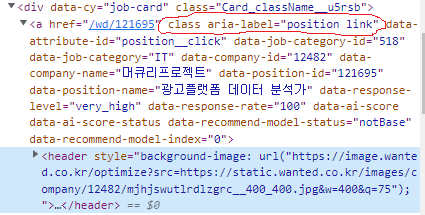

In [ ]:
keyword_list = []
for i in keyword_result:
  if keyword in i.text: #.text는 태그안에 있는 텍스트만 출력해줍니다.
    ## 찾은 태그가 포함된 소스에서 href 내용만 가져와서 list에 추가해준다.
    keyword_list.append(i['href'])

In [ ]:
print(keyword_list) #하나 하나가 우리가 찾아야 하는 회사입니다.

['/wd/61925', '/wd/121402', '/wd/121063', '/wd/118958', '/wd/94785', '/wd/113040', '/wd/76572', '/wd/94942', '/wd/114990', '/wd/48786', '/wd/93832', '/wd/102564', '/wd/115293', '/wd/69754', '/wd/69985', '/wd/69986', '/wd/69753', '/wd/116642', '/wd/105754', '/wd/76032', '/wd/112412', '/wd/102289', '/wd/106097', '/wd/116951', '/wd/117382', '/wd/109332', '/wd/120857', '/wd/120842', '/wd/71135', '/wd/119586', '/wd/105520']


In [ ]:
len(keyword_list) # 길이를 구하면 몇 건인지 알 수 있습니다.
#print(keyword_list[0]) #이것도 궁금하시면 주석 지우고 해보세요

31

In [ ]:
info_list = ['주요업무', '자격요건', '우대사항', '혜택 및 복지', '기술스택 ・ 툴'] # 원티드는 이 키워드로 형식이 맞추어서 있습니다. 운이 좋네요^^
print(info_list)

['주요업무', '자격요건', '우대사항', '혜택 및 복지', '기술스택 ・ 툴']


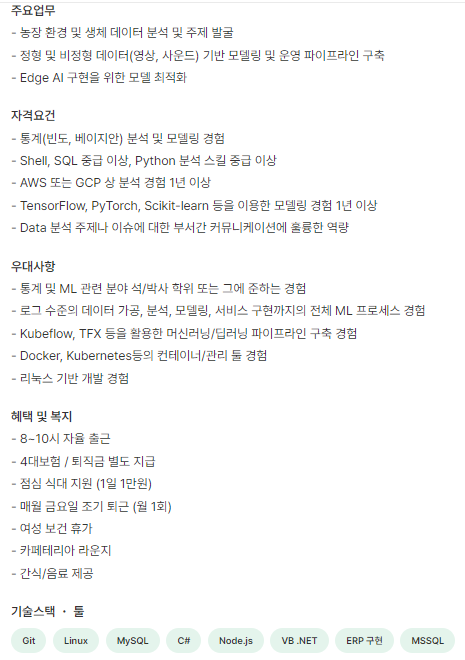

In [ ]:
# 비어있는 데이터 프레임을 생성합니다. 이 데이터 프레임에 우리가 찾는 정보를 저장하겠습니다.
columns=['회사이름','주요업무', '자격요건', '우대사항', '혜택 및 복지', '기술스택 ・ 툴', '지역']
df = pd.DataFrame(columns=columns)
df

,회사이름,주요업무,자격요건,우대사항,혜택 및 복지,기술스택 ・ 툴,지역


In [ ]:
# for문을 사용해 회사 별 링크로 이동 한 뒤
# 다시 for문을 만나 info_list의 정보를 찾은 뒤
# 회사 이름과 위치를 찾은 다음 for문을 나간다.

for i in range(len(keyword_list)):
  info_tag_line = []
  driver = webdriver.Chrome('chromedriver', options=options)
  #driver.get('https://www.wanted.co.kr/wd/121695')
  driver.get('https://www.wanted.co.kr'+keyword_list[i]) #keyword_list증가시키며 링크 이동
  h = driver.page_source
  driver.quit()

  com_html = BeautifulSoup(h,'html.parser')

  company_name = com_html.find('h5') #회사이름

  # 보통 우리가 지금까지 필요한 정보를 찾던 방식은 HTML태그를 찾거나 태그의 클래스 이름 등을 찾아서 필요한 정보를 찾았습니다.
  # 그러나, Javascript태그로 들어가 있는 정보가 있더군요. Javascript는 java랑 다릅니다. HTML, CSS, Javasript이 세가지로 웹페이지를 구상합니다.
  # 웹상에서는 일반 HTML태그안에 있는데 HTML정보를 불러오고 보니 Javasript태그가 보이더군요.

  company_loc = com_html.find('script',{'type':'application/ld+json'}) #회사 주소 불러오기 #import json 을 한 이유 # 한 줄씩 처리되기에 변수 이름이 같아도 상관없습니다. 
  company_loc = dict(json.loads(company_loc.text))['jobLocation']['address']['streetAddress'] 
 

  for j in info_list:
        info_tag = com_html.find('h6', string = j) #'주요업무', '자격요건', '우대사항', '혜택 및 복지', '기술스택 ・ 툴'
        if info_tag != None: #주요업무, 자격요건, 우대사항, 혜택 및 복지는 다 있지만 기술스택 툴은 없는 기업도 있습니다.
          if j == '기술스택 ・ 툴':  # info_tag가 None이 아니라면 즉 어떤 값이 있다면 if문 아래 두번쨰 if문을 수행 합니다. 
            info_tag_line.append(list(map(lambda x:x.text,info_tag.next_element.next_element.findChild().findChildren())))  #기술스택 ・ 툴을 적어 놓지 않는 기업도 있기에 구별합니다.
          else:  
            info_tag_line.append(info_tag.nextSibling.text)   
        else:
          info_tag_line.append(0) #info_tag가 None 즉 값이 없다면 0을 채워줍니다.
     
  df = df.append(pd.Series([company_name, info_tag_line[0], info_tag_line[1], info_tag_line[2], info_tag_line[3], info_tag_line[4], company_loc],index=columns),ignore_index=True) # 데이터 프레임에 차곡차곡 저장
        #df = df.append(pd.Series([company_name]+info_tag_line+[company_loc],index=columns),ignore_index=True)
  i += 1  # 첫번째 for문의 i값을 증가시켜 사이트 주소를 바꿔 다시 찾습니다. 첫번째 for문이 끝날때까지 반복합니다. 대략 최장6분에서 최소 2분정도 걸립니다. 71건이 5분 40초, 31건이 2분 4초 걸림

# df.to_csv("wanted_IoT.csv", sep=',', encoding = "UTF-8") # CSV or Excel로 저장시 이름 바꿔주세요. #마지막으로 

#회사 이름에 들어가 있는 html Tag 제거 # 이대로 출력한다면 회사 이름에는 태그가 그대로 같이 나옵니다. 태그를 제거하고 택스트만 추출할게요.
def name(x):
  if x:
    return x.text

df['회사이름'] = df['회사이름'].apply(name)

df.to_csv("wanted.csv", sep=',', encoding = "UTF-8") # CSV or Excel로 저장시 이름 바꿔주세요. # 마지막으로 저장합니다. 찾는 직무가 달라질 때마다 꼭! 꼭! 이름을 바꿔줍니다.

In [ ]:
df # 만든 데이터 프레임 확인할게요. 잘 만들어 졌습니다.

# 찾아야 하는 결과가 많을 수록 간혹 회사이름, 주요업무, 자격요건, 우대사항, 혜택 및 복지가 0으로 나올때가 있습니다. 런타임오류 인듯 합니다.
# 12가지 직무 다 돌려보고 오류 수정에 대한 이야기를 해야 할거 같아요. # 기술스택 ・ 툴은 0이 나올 수 있습니다. 그건 오류가 아니에요.

,회사이름,주요업무,자격요건,우대사항,혜택 및 복지,기술스택 ・ 툴,지역
0,데키스트,"• IoT 단말기 개발 (센서, OTA,I2C,SPI LCD, USB, LORA, ...","• 임베디드 시스템 이해• C언어 상급• 통신 모듈 사용 경험 (BLE,WIFI,L...","• Microchip , TI 반도체 제품 사용 경험• 무선 통신 기반의 프로젝트 ...",1. 근무형태: 정규직(수습기간)-2개월2. 근무일시: 주 5일(월~금) 오전 9:...,"[Git, VueJS, JavaScript, PHP, Python, IoT, AWS...",경기 용인시 기흥구 흥덕1로13
1,드림에이스,1. 스마트시티 IoT 디바이스 기구/디자인 설계2. 시제품 제작 및 양산 팔로업3...,1. 유관 업무 5년 이상 경력자 2. 양산 설계 경험자3. 제품 인증 경험자4. ...,1. 기계공학 계열 전공자2. 3D 프린팅 경험자[이러한 동료와 함께 하고 싶습니다...,[더 나은 Work Place를 위해]• 좋은 장비를 갖춰야 일할 맛이 난다.- 업...,"[생산, 품질 향상, 품질 관리, 설계, 제품 품질, 품질 관리, 공정 개발, 생산...","서울 성동구 성수일로 19 유한타워 1, 2, 3층"
2,드림에이스,1. 디지털 및 아닐로그 회로 설계 및 P/L 작성2. 디지털 및 아닐로그 PCB ...,1. 전자 회로 설계 경력 10년 이상 경력자2. 회로도 작성 툴 사용 기술 (or...,"1. 전자 및 전기, 산업 공학 전공자[이러한 동료와 함께 하고 싶습니다!]1. 회...",[더 나은 Work Place를 위해]• 좋은 장비를 갖춰야 일할 맛이 난다.- 업...,0,"서울 성동구 성수일로 19 유한타워 1, 2, 3층"
3,드림에이스,"1. 개발 문서 및 생산 자료 검토 (BOM , 회로도 ,거버데이터) 2. 제조자료...",1. 유관 업무 5년 이상 경력자2. 생산기술 업무 경험자3. 외주관리 업무 경험자,1. ISO 품질 시스템 업무 경험자2. 전기/전자계열 전공자 [이러한 동료와 함께...,[더 나은 Work Place를 위해]• 좋은 장비를 갖춰야 일할 맛이 난다.- 업...,"[생산, 품질 향상, 품질 관리, 설계, 제품 품질, 품질 관리, 공정 개발, 생산...","서울 성동구 성수일로 19 유한타워 1, 2, 3층"
4,드림에이스,"1. IoT, Digital Product 디자인 - 모빌리티 및 생활가전 제품 디...",1. 제품 디자인 관련 경력 5년 이상 경력자 2. 신제품 컨셉 제안 경험자3. 제...,"1. 산업 디자인, 제품 디자인 전공자 또는 관련 업무 전공자 [이러한 동료와 함께...",[더 나은 Work Place를 위해]• 좋은 장비를 갖춰야 일할 맛이 난다.- 업...,"[디자인 관리, HCI, 서비스 디자인, Sketch, 웹 디자인, CSS, 디자인...","서울 성동구 성수일로 19 유한타워 1, 2, 3층"
5,드림에이스,1. 기구 설계 및 개발 (2D & 3D) - 생활가전 제품 관련2. 개발 문서 작...,1. 유관 경력 5년 이상 경력자2. CAD/CAM 능숙자 (2D & 3D)3. 디...,"1. 전자, 기계 및 공학 전공자2. 기구 설계 관련 자격증 소유자3. ISO 품질...",[더 나은 Work Place를 위해]• 좋은 장비를 갖춰야 일할 맛이 난다.- 업...,0,"서울 성동구 성수일로 19 유한타워 1, 2, 3층"
6,정육각,• 정육각 조리 기기(IoT)와 연계된 앱 서비스의 초기 기획 및 프로젝트 관리 -...,"• 앱 서비스 기획 3년 이상 경력 보유자• User, Tech, UX/UI 트렌드...",• IoT 기기 관련 모바일 앱의 기획 / PM 경험 있으신 분• 초기 기획 - 구...,1. 근무조건• 스마트하고 성격까지 훌륭한 동료들• 신논현역 5분 거리에 위치한 접...,0,강남구 강남대로 112길 32
7,정육각,• 정육각 IoT기기의 임베디드 SW 개발 - IoT기기의 MCU기반 컨트롤 보드와...,• Embedded SW 개발경험이 있으신 분• 빠른 학습속도를 가지고 정육각과 함...,"• 언어에 대한 경험이 6개월 이상인 분• 소프트웨어 품질에 관심이 많고, 소프트웨...",1. 근무조건• 스마트하고 성격까지 훌륭한 동료들• 신논현역 5분 거리에 위치한 접...,"[Node.js, Golang]",강남구 강남대로 112길 32
8,엔텔스,1. oneM2M 표준 프로토콜 기반 IoT플랫폼 기능 개발- 개발환경 : Cont...,"• 학력 : 무관• 경력 : 경력 6년 이상• Java/JSP, Spring fra...","• Spring Boot, Spring Famework 에 대한 이해도 보유 / 개...",• nDay : 매주 금요일 오후 4시 조기 퇴근• 통합복리비 지급 : 100만원...,"[Linux, UNIX, JSP, Spring Framework, JPA, JSP ...",서울 강남구 학동로 401(청담동 금하빌딩) 8층
9,아이엠랩(I.M.LAB),- 응급의료 교육 IoT(소형/저전력/무선) HW 개발- 최신 HW 기술 검증 및 ...,✻ 이기종 센서 탑재 HW 회로설계 및 Artwork 가능자✻ 저전력 무선제품 개발...,✻ 하드웨어 개발 경력(2년이상) 우대✻ 관련 전공 졸업자(전자/전파 등)✻ 국내외...,"• 근무 형태 - 유연근무 (8:30~10시 출근, 17:30~19시 퇴근), 자유...","[Git, Github, Android, Firebase, iOS, MySQL, R...","서울특별시 서초구 남부순환로347길 53, 파이원빌딩 201호"


In [ ]:
## 아래 코드는 참고용 입니다. 꼭 안 봐도 됩니다.

In [ ]:
#기술스텍불러오기
#info_tag.find_next_sibling().text//
list(map(lambda x:x.text,info_tag.next_element.next_element.findChild().findChildren()))

['Python', 'SQL', 'Google Analytics']

In [ ]:
info_tag_line = info_tag.next_sibling
info_tag_line.text

'- 매월 통신비 비용 제공- 매년 1회 건강 검진 제공- 주3일 재택 근무 가능 (협의시)'

In [ ]:
# 회사 주소 불러오기
import json
loc = com_html.find('script',{'type':'application/ld+json'})
loc2 = dict(json.loads(loc.text))['jobLocation']['address']['streetAddress']
print(loc)

<script type="application/ld+json">{"@context":"https://schema.org","@type":"JobPosting","title":"데이터 분석가","description":"데이터 가공, 분석 및 시각화\n- 온라인로그/캠페인 데이터 등을 활용하여 비즈니스 이슈에 대해 가설을 수립\n- 데이터 핸들링 및 분석\n- 리포트 작성, 대시보드 기획/관리 등 시각화","url":"https://www.wanted.co.kr/wd/97358","hiringOrganization":{"@type":"Organization","name":"휴머스온","logo":"https://static.wanted.co.kr/images/wdes/0_4.5ae2c9e8.jpg"},"datePosted":"2022-07-04","industry":"IT, 컨텐츠","occupationalCategory":"Management & Business, Data Analyst,데이터 분석가","validThrough":"2022-08-01","employmentType":"FULL_TIME","jobLocation":{"@type":"Place","address":{"@type":"PostalAddress","addressRegion":"서울","addressCountry":"KR","streetAddress":"서울특별시 강남구 역삼2동 세방빌딩 10층, 12층"}},"experienceRequirements":["경력"]}</script>


In [ ]:
#'h5'태그에는 회사 이름이 들어가 있습니다.
company_name = com_html.find('h5')
company_name.text

머큐리프로젝트


In [ ]:
#info_tahg는 info_list에 들어있는 텍스트와 같은 h6태그를 찾음
info_tag = com_html.find('h6', string = info_list[0])
info_tag.nextSibling.text

In [ ]:
#'주요업무', '자격요건', '우대사항', '혜택 및 복지' 불러오기
apply = h6.next_sibling
print(apply.text)
#print(apply.text)
#a = apply.text.split('-')
#print(a)
    

- 데이터 분석에 대한 팀이 존재 하지 않는 상황으로 분석을 위한 초기 인프라 구축이 가능하신분- 3년 이상 실질적인 비즈니스 문제를 해결하기 위한 기법 또는 머신러닝을 적용한 경력을 보유한 분- 서비스를 개선하는 데 도움이 되는 논문이나 기술들을 빠르게 학습하여 프로토타이핑할 수 있는 문제해결 능력을 갖추신 분- 지원시 포트폴리오 필수 첨부(PPT, PDF, URL 등 자유형식)


Mounted at /content/gdrive


In [ ]:
#pip install pandas

In [ ]:
# import pandas as pd

# file = pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/txt_to_csv.txt')
# new_csv_file = file.to_csv(r'/content/gdrive/My Drive/Colab Notebooks/txt_to_csv.csv', encoding='utf-8')

In [ ]:
df.duplicated()

TypeError: ignored

In [ ]:
df['지역'] = df['지역'].apply(lambda x: dict(json.loads(x.text))['jobLocation']['address']['streetAddress'])

In [ ]:
def name(x):
  if x:
    return x.text

df['회사이름'] = df['회사이름'].apply(name)

AttributeError: ignored

In [ ]:
keyword_list[df[df['회사이름'].isnull()].index[0]-1:df[df['회사이름'].isnull()].index[0]+2]

['/wd/65289', '/wd/90183', '/wd/63921']

In [ ]:
df

,회사이름,주요업무,자격요건,우대사항,혜택 및 복지,기술스택 ・ 툴,지역
0,데키스트,"• IoT 단말기 개발 (센서, OTA,I2C,SPI LCD, USB, LORA, ...","• 임베디드 시스템 이해• C언어 상급• 통신 모듈 사용 경험 (BLE,WIFI,L...","• Microchip , TI 반도체 제품 사용 경험• 무선 통신 기반의 프로젝트 ...",1. 근무형태: 정규직(수습기간)-2개월2. 근무일시: 주 5일(월~금) 오전 9:...,"[Git, VueJS, JavaScript, PHP, Python, IoT, AWS...",경기 용인시 기흥구 흥덕1로13
1,드림에이스,1. 스마트시티 IoT 디바이스 기구/디자인 설계2. 시제품 제작 및 양산 팔로업3...,1. 유관 업무 5년 이상 경력자 2. 양산 설계 경험자3. 제품 인증 경험자4. ...,1. 기계공학 계열 전공자2. 3D 프린팅 경험자[이러한 동료와 함께 하고 싶습니다...,[더 나은 Work Place를 위해]• 좋은 장비를 갖춰야 일할 맛이 난다.- 업...,"[생산, 품질 향상, 품질 관리, 설계, 제품 품질, 품질 관리, 공정 개발, 생산...","서울 성동구 성수일로 19 유한타워 1, 2, 3층"
2,드림에이스,1. 디지털 및 아닐로그 회로 설계 및 P/L 작성2. 디지털 및 아닐로그 PCB ...,1. 전자 회로 설계 경력 10년 이상 경력자2. 회로도 작성 툴 사용 기술 (or...,"1. 전자 및 전기, 산업 공학 전공자[이러한 동료와 함께 하고 싶습니다!]1. 회...",[더 나은 Work Place를 위해]• 좋은 장비를 갖춰야 일할 맛이 난다.- 업...,0,"서울 성동구 성수일로 19 유한타워 1, 2, 3층"
3,드림에이스,"1. 개발 문서 및 생산 자료 검토 (BOM , 회로도 ,거버데이터) 2. 제조자료...",1. 유관 업무 5년 이상 경력자2. 생산기술 업무 경험자3. 외주관리 업무 경험자,1. ISO 품질 시스템 업무 경험자2. 전기/전자계열 전공자 [이러한 동료와 함께...,[더 나은 Work Place를 위해]• 좋은 장비를 갖춰야 일할 맛이 난다.- 업...,"[생산, 품질 향상, 품질 관리, 설계, 제품 품질, 품질 관리, 공정 개발, 생산...","서울 성동구 성수일로 19 유한타워 1, 2, 3층"
4,드림에이스,"1. IoT, Digital Product 디자인 - 모빌리티 및 생활가전 제품 디...",1. 제품 디자인 관련 경력 5년 이상 경력자 2. 신제품 컨셉 제안 경험자3. 제...,"1. 산업 디자인, 제품 디자인 전공자 또는 관련 업무 전공자 [이러한 동료와 함께...",[더 나은 Work Place를 위해]• 좋은 장비를 갖춰야 일할 맛이 난다.- 업...,"[디자인 관리, HCI, 서비스 디자인, Sketch, 웹 디자인, CSS, 디자인...","서울 성동구 성수일로 19 유한타워 1, 2, 3층"
5,드림에이스,1. 기구 설계 및 개발 (2D & 3D) - 생활가전 제품 관련2. 개발 문서 작...,1. 유관 경력 5년 이상 경력자2. CAD/CAM 능숙자 (2D & 3D)3. 디...,"1. 전자, 기계 및 공학 전공자2. 기구 설계 관련 자격증 소유자3. ISO 품질...",[더 나은 Work Place를 위해]• 좋은 장비를 갖춰야 일할 맛이 난다.- 업...,0,"서울 성동구 성수일로 19 유한타워 1, 2, 3층"
6,정육각,• 정육각 조리 기기(IoT)와 연계된 앱 서비스의 초기 기획 및 프로젝트 관리 -...,"• 앱 서비스 기획 3년 이상 경력 보유자• User, Tech, UX/UI 트렌드...",• IoT 기기 관련 모바일 앱의 기획 / PM 경험 있으신 분• 초기 기획 - 구...,1. 근무조건• 스마트하고 성격까지 훌륭한 동료들• 신논현역 5분 거리에 위치한 접...,0,강남구 강남대로 112길 32
7,정육각,• 정육각 IoT기기의 임베디드 SW 개발 - IoT기기의 MCU기반 컨트롤 보드와...,• Embedded SW 개발경험이 있으신 분• 빠른 학습속도를 가지고 정육각과 함...,"• 언어에 대한 경험이 6개월 이상인 분• 소프트웨어 품질에 관심이 많고, 소프트웨...",1. 근무조건• 스마트하고 성격까지 훌륭한 동료들• 신논현역 5분 거리에 위치한 접...,"[Node.js, Golang]",강남구 강남대로 112길 32
8,엔텔스,1. oneM2M 표준 프로토콜 기반 IoT플랫폼 기능 개발- 개발환경 : Cont...,"• 학력 : 무관• 경력 : 경력 6년 이상• Java/JSP, Spring fra...","• Spring Boot, Spring Famework 에 대한 이해도 보유 / 개...",• nDay : 매주 금요일 오후 4시 조기 퇴근• 통합복리비 지급 : 100만원...,"[Linux, UNIX, JSP, Spring Framework, JPA, JSP ...",서울 강남구 학동로 401(청담동 금하빌딩) 8층
9,티오더,• 여러 벤더의 POS 장비와 티오더 서비스와의 연동관련 개발 업무• 여러 IoT ...,• 학력 : 4년대 졸업• 경력 : 실무 경력 1년 이상 ~ 7년 미만• Softw...,• 여러 IoT 및 로봇 장비 연동 경험이 있으신 분• 여러 벤더의 POS 장비와 ...,- 원하시는 사양의 컴퓨터 (맥북 가능) 지급해 드립니다. 업무 효율만 생각합시다!...,"[Git, Delphi, AWS, Windows 서비스]",서울 구로구 디지털로33길 48 대륭포스트타워7차 9층


In [ ]:
df.to_csv("wanted.csv", sep=',', encoding = "UTF-8")

In [ ]:
df.to_excel("wanted_IoT.xls")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


In [ ]:
pd.read_csv("wanted.csv")

,Unnamed: 0,회사이름,주요업무,자격요건,우대사항,혜택 및 복지,기술스택 ・ 툴,지역
0,0,<h5>에비드넷</h5>,"• 의료 빅데이터 분석(데이터 전처리, 통계분석)• 의료 빅데이터 연구 기획","• 학사이상(통계, 수학, 산업공학, 컴퓨터 공학, 생명과학, 의료정보학 등)• 병...","• SAS, SPSS 등 분석툴 사용 가능• Python 사용 가능• 의학논문 작성...",[Work]• 시차출퇴근제도(8시~10시 출근)• 고사양 최신 업무용 PC 지원• ...,"['Python', 'R', 'SAS', 'SPSS']",경기도 성남시 분당구 판교로 323 벤처포럼빌딩 5층
1,1,<h5>머큐리프로젝트</h5>,- AdTech 도메인에 특화된 데이터 분석 및 개발- 머신러닝/데이터 분석 기술을...,- 데이터 분석에 대한 팀이 존재 하지 않는 상황으로 분석을 위한 초기 인프라 구축...,- AdTech 도메인에 대한 지식을 보유하신 분- SQL을 능숙하게 다루실수 있는...,- 매월 통신비 비용 제공- 매년 1회 건강 검진 제공- 주3일 재택 근무 가능 (...,0,"서울시 강남구 봉은사로 38길 13, 3층, 4층, 5층"
2,2,<h5>휴머스온</h5>,"데이터 가공, 분석 및 시각화- 온라인로그/캠페인 데이터 등을 활용하여 비즈니스 이...","- 데이터 분석 경험 1년 이상, 통계지식 보유- 마케팅전략/디지털마케팅전략/소비트...",- 통계 지식 보유- 데이터 엔지니어 및 데이터 사이언티스와 협업 능력 및 경험 보...,＜업무에만 집중 할 수 있는 근무환경을 만들고자 노력합니다＞ * 선릉역 3번출구 도...,"['Python', 'SQL', 'Google Analytics']","서울특별시 강남구 역삼2동 세방빌딩 10층, 12층"
3,3,<h5>더블유클럽</h5>,• 서비스 지표 상승 및 문제 해결을 위한 데이터 기반의 인사이트 제공• 데이터 분...,• 단순한 아이디어 차원이 아닌 실질적인 Action 을 위한 구체적인 인사이트를 ...,"• ELK (Elastic Search, Kibana) 활용 경험이 있으신 분• G...",■W 기업문화- 대표를 포함하여 전직원 영어 닉네임 사용 (수평적인 사내 분위기)-...,"['Firebase', 'R', 'SQL', 'Excel', 'Google Anal...",서울특별시 강남구 선릉로 428 (위워크타워)
4,4,<h5>파이프트리스마트팜(PAIPTREESmartFarmInc.)</h5>,"- 농장 환경 및 생체 데이터 분석 및 주제 발굴- 정형 및 비정형 데이터(영상, ...","- 통계(빈도, 베이지안) 분석 및 모델링 경험- Shell, SQL 중급 이상, ...",- 통계 및 ML 관련 분야 석/박사 학위 또는 그에 준하는 경험- 로그 수준의 데...,- 8~10시 자율 출근- 4대보험 / 퇴직금 별도 지급- 점심 식대 지원 (1일 ...,"['Git', 'Linux', 'MySQL', 'C#', 'Node.js', 'VB...",서울특별시 강남구 봉은사로 125 리스트빌딩
...,...,...,...,...,...,...,...,...
68,68,<h5>컬리</h5>,"• 분석을 위한 데이터를 설계 및 적재하고 대시보드, 알람 등의 프로덕트로 만들어 ...",• 유관 업무 경력 2년 이상을 선호합니다. 다만 기본 스킬이 충분하다면 경력이 조...,"• 커머스, 물류 또는 로그 분석 프로젝트의 경험이 있으신 분• 커머스, 물류 분야...","✔모두가 집중하고 성장할 수 있도록, 최적의 근무 환경을 제공해요✔• 리프레시도 필...","['Python', 'R', 'SQL', 'Data Analysis', 'Table...",서울특별시 강남구 테헤란로 133
69,69,<h5>라인게임즈</h5>,"• 게임 로그 분석 및 통계 분석• 게임 데이터 분석을 통한, 문제점 파악 및 개선...",• 관련 경력 3년 이상 • 게임에 대한 열정과 및 게임 산업에 대한 이해가 있으...,• 게임 업계 혹은 타 업계 데이터 분석 실무 경험• R 혹은 Python을 이용한...,• 연 1회 프리미엄 건강검진 • 사내 전신 마사지실 및 헬스장• 사내 복지시설 내...,0,서울 강남구 테헤란로 218 AP 타워
70,70,<h5>플라이셔(Flysher)</h5>,• 로그 설계 : 게임을 플레이하며 의사결정에 필요할 정보를 DB에 어떻게 쌓을지 ...,• 유관 업무 경력 3~5년인 분• SQL(Redshift)에 능숙한 분• 통계 지...,• 직무 관련 전공자 (컴퓨터공학/통계/수학 등)• Cloud(AWS 등) 개발 환...,[우리는 성과를 공유합니다]• 동종업계 상위 수준 연봉 보장• 각종 인센티브 제공•...,0,강남구 테헤란로 223 큰길타워 8층
71,71,<h5>콘텐츠웨이브(wavve)</h5>,"• 데이터 분석/이해에 기반하여, 가입자 매출/증대를 위한 CRM기획 및 운영 ...",• 데이터 분석 유관 경력 7년 이상자• 데이터기반 가설수립 및 문제해결 역량• S...,"• 구독서비스 업계 경력(OTT, 뮤직 등)",“워라밸–Work & Life Balance” 일과 삶의 균형이 있는 회사 • 코로...,"['SAS', 'SQL', 'Excel', 'Google Analytics', 'T...",서울 영등포구 여의나루로 60 포스트타워
